# Part1: Exploratory Data Analysis(EDA)

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set(font_scale=2) 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [45]:
data=pd.read_csv('../input/train.csv')

In [46]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

How many Survived??

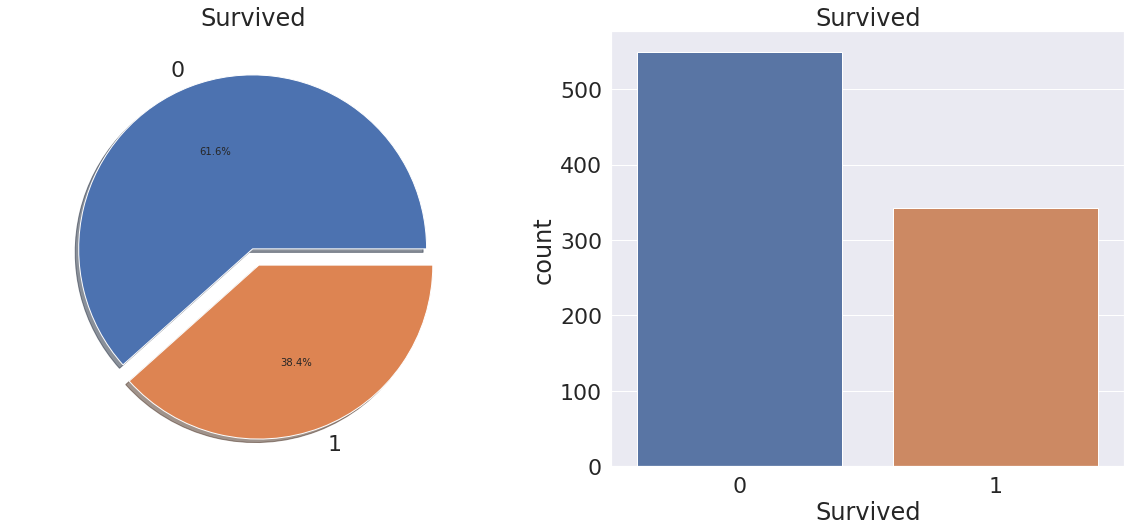

In [48]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel(' ')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## Analysing The Features

### Sex--> Categorical Feature

In [49]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

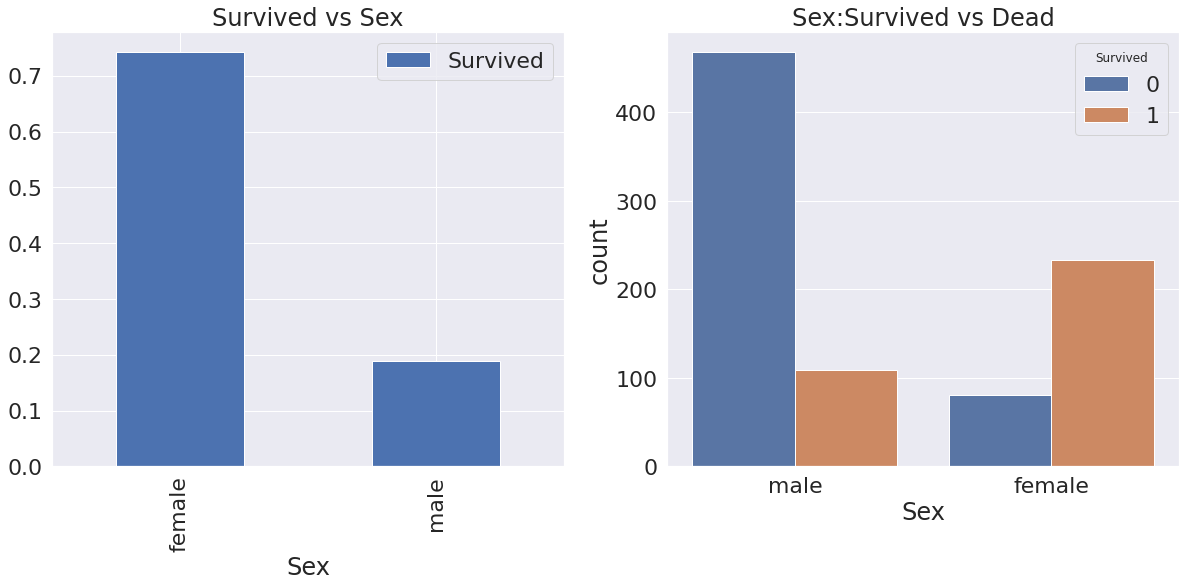

In [50]:
f, ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

여자가 생존률이 더 높은 모습을 볼 수 있다

### Pclass --> Ordinal Feature

In [51]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


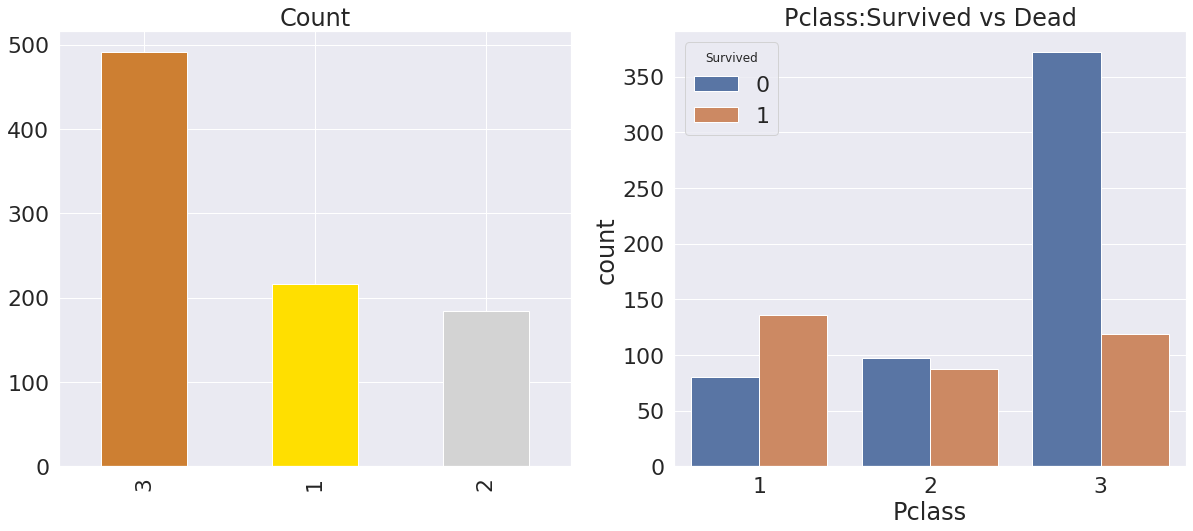

In [52]:
f, ax=plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_title('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

사람들은 돈으로 모든것을 살 수 없다고 말합니다.  
하지만 가장 높은 등급인 1등급 클래스의 생존률이 더 높은 모습을 보입니다.  

In [55]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

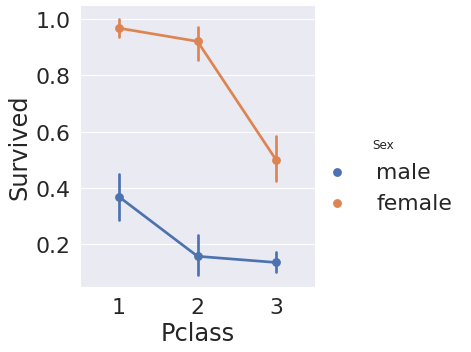

In [56]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

위에서 FactorPlt을 사용했다. 그 이유는 범주형 데이터를 잘 구분 할 수 있기 때문이다. 

In [57]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


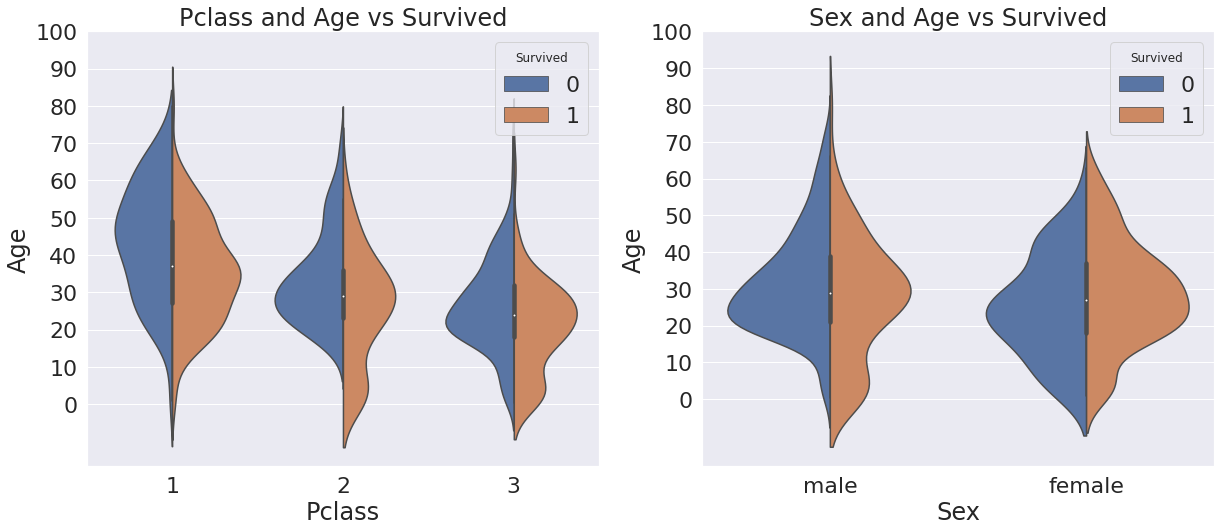

In [62]:
f,ax=plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot("Pclass", "Age", hue="Survived",data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex", "Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

**분석결과**  
1) Pclass에 따라 어린이의 수가 증가하고 10 세 미만의 행인 (즉, 어린이)의 
생존율은 Pclass에 관계없이 양호 해 보입니다.   

2) Pclass1의 20-50 세 Passenegers의 생존 가능성은 높고 여성에게 더 좋습니다.  

3) 남성의 경우 연령이 증가함에 따라 생존 확률이 감소합니다.  

우리는 앞서 Age의 칼럼에 177명의 NaN(결측)값이 있음을 확인했습니다.  
하지만 임의로 NaN의 값을 채우기엔 연령이 너무 다양합니다.  
그렇다면 우리는 어떻게 결측값을 채울 수 있을 까요?  
바로 이름 앞의 Ms, Mss, Mr를 이용하는 것입니다.  
한국에는 없지만, 외국에는 이런 특징 덕분에 그나마 나이를 예측할 수 있습니다.  
다시 말해, 더욱 신빙성 있는 데이터로 만들 수 있는 것입니다.

In [81]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [82]:
data['Initial'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Initial, dtype: object

In [83]:
pd.crosstab(data.initial, data.Sex).T.style.background_gradient(cmap='summer_r')

initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


그래프를 보니까 대충 Master, Miss, Mr, Mrs가 많이 보이는 군요.  
여기서는 Other을 추가해서 총 5가지 카테고리로 나눈것으로 보입니다.  
Master은 8세 미만의 사람을 지칭하는 initial이라고 하는 군요.  

In [84]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [85]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

위의 결과를 보면 각 카테고리 별로 나이가 나오게 됩니다.  
0~80세의 나이를 무작위로 넣는 것 보다 이렇게 나눠서 이름을 기반으로 넣는 것이 더 나을 것 같습니다.

In [86]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [87]:
data.Age.isnull().any()

False

null값이 없어진 것을 확인 할 수 있습니다.

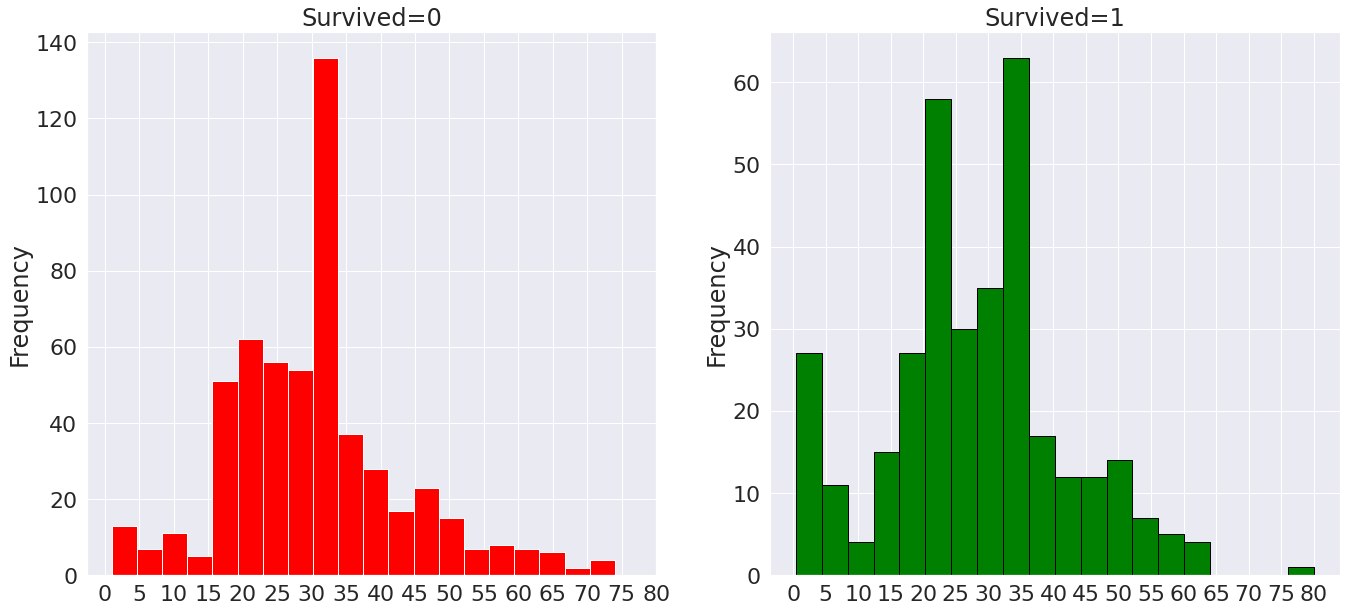

In [88]:
f, ax=plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='white', color='red')
ax[0].set_title('Survived=0')
x1=list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived=1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

생존율 그래프를 보면 0-5세 사이의 생존율이 높아보입니다.  
그리고 나이가 높은 사람들이 사망율 보다 생존율이 높은 경향을 보입니다.  
빈먄에 30대 분들의 사망율이 높은 모습을 볼 수 있습니다.  

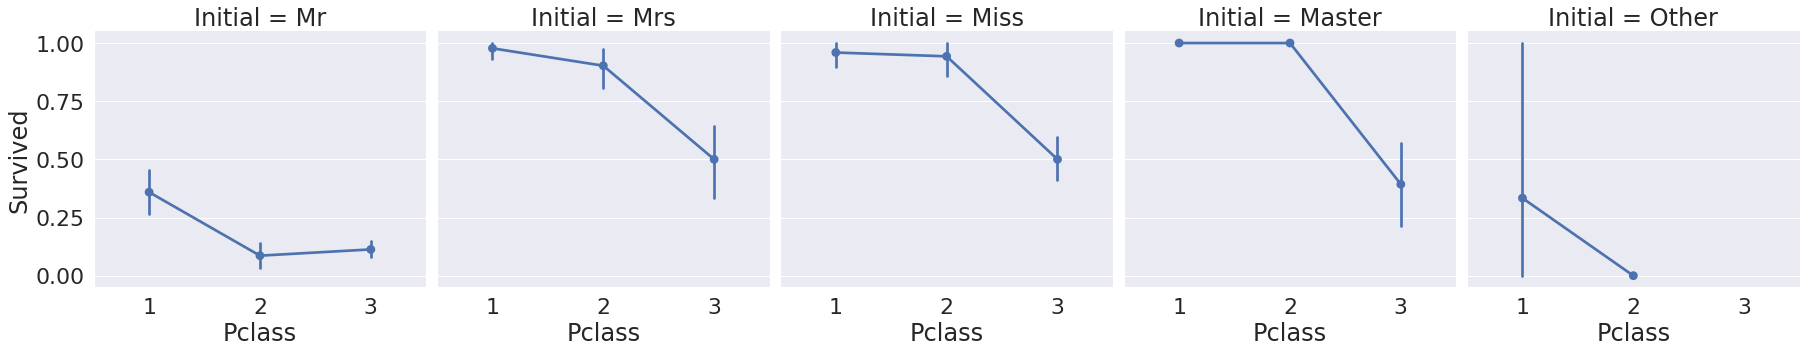

In [90]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

역시 여성들과 아이들의 생존율이 더 높은 경향을 확인 할 수 있습니다.  

### Embarked--> Categorical Value

In [100]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], 
            margins=True).style.background_gradient(cmap='Blues')
                                                                                                           

위의 그래프는 [탑승구, 객실등급]을 행으로 [성별, 생존율]을 열로 두고 관계를 보여주는 그래프이다.  
색의 변화를 통해 칼럼 사이의 관계를 눈으로 확인 할 수 있다.

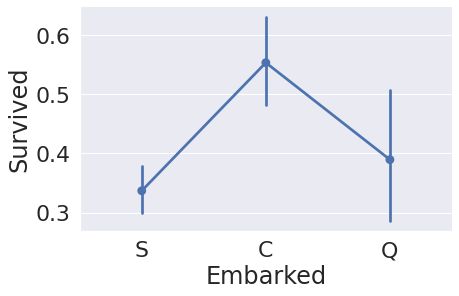

In [106]:
sns.factorplot('Embarked', 'Survived', data=data)
fig=plt.gcf()
fig.set_size_inches(7, 4)
plt.show()

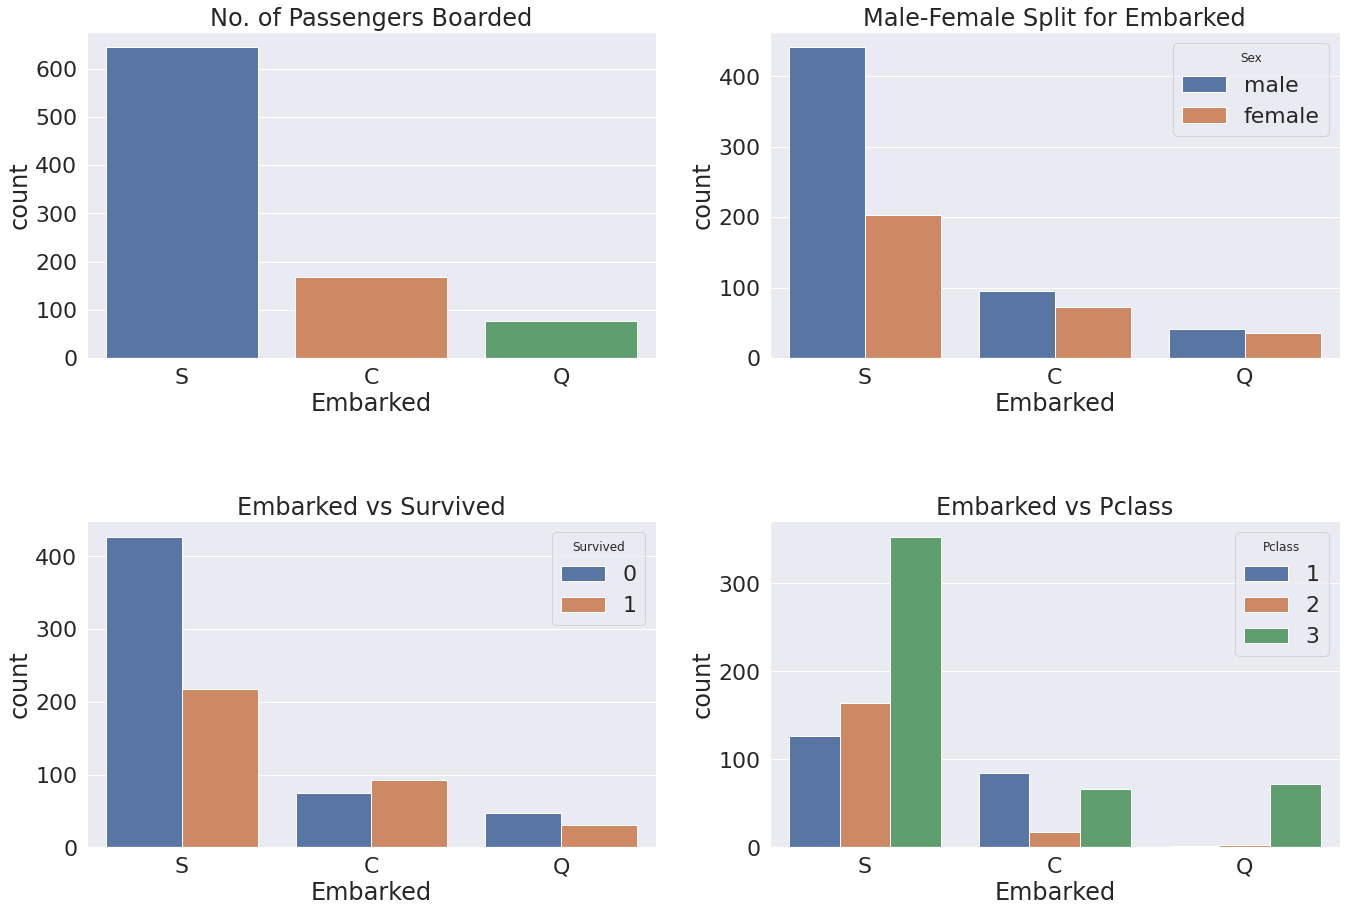

In [108]:
f, ax=plt.subplots(2,2, figsize=(20, 15))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

분석결과  
S와 Q 탑승구에는 Pclass가 3인 경우가 많이 있었습니다.  
그래서 생존율은 C 탑승구가 상대적으로 높았고 나머지는 사망율이 더 높습니다.

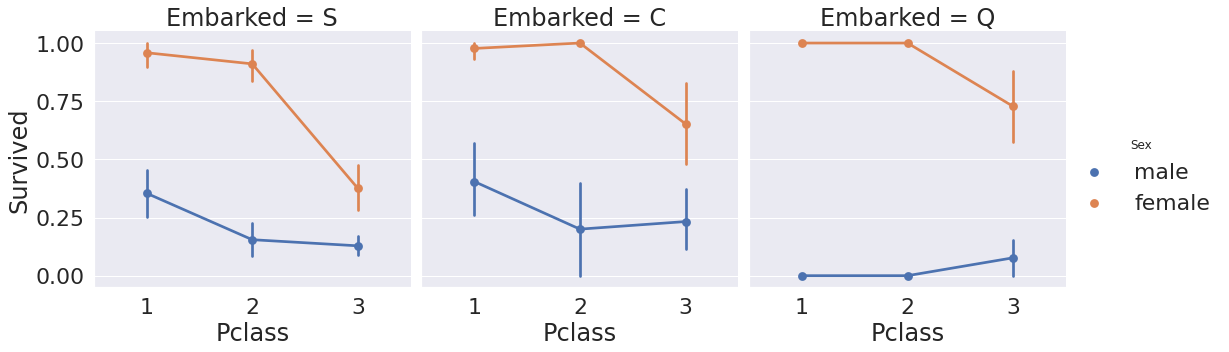

In [109]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

역시 first 클래스의 생존율이 높아보입니다.  
그리고 여자의 생존율도 높아보이는 것을 볼 수 있습니다.  
하지만 Q에서는 third 클래스의 생존율이 높습니다.  

### Filling Embarked NaN

In [110]:
data['Embarked'].fillna('S', inplace=True)

In [111]:
data.Embarked.isnull().any()

False

### SibSip-->Discrete Feature

In [113]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='Blues')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


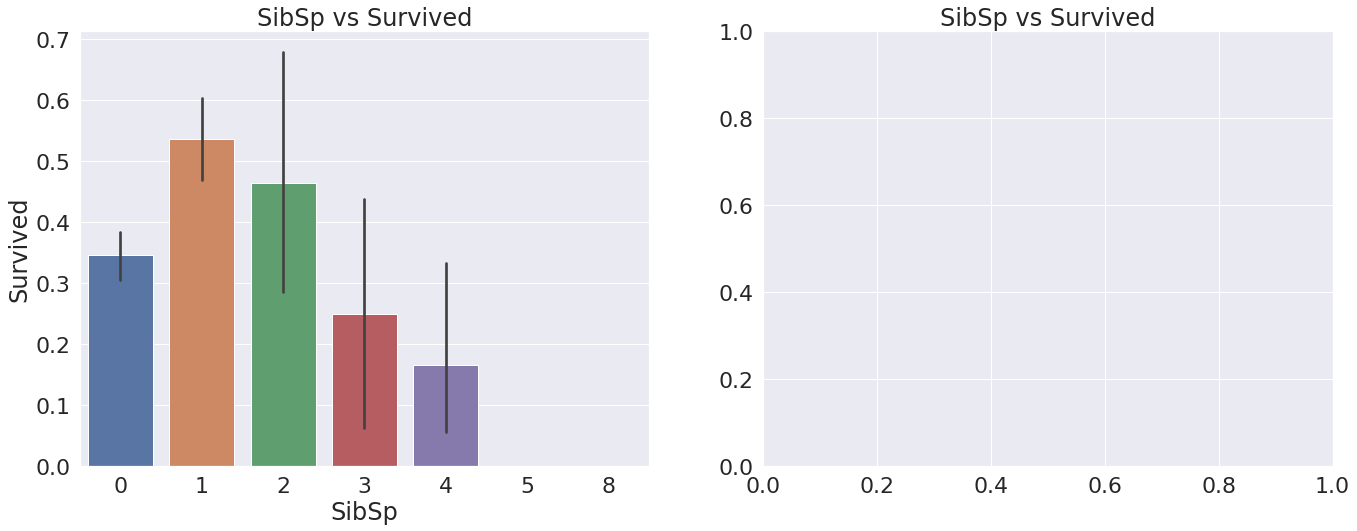

In [119]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

혼자만 있을 때는 생존률이 대략 34.5%입니다.  
그리고 가족이 1, 2명 더 있으면 생존률이 대략 늘어나지만, 
3, 4 명이 되면 더 줄어들게 됩니다.  
그 이유는 아마 서로 구하다가 사고를 당하는 것 같습니다.  
근데 5, 8명 생존률이 0입니다. 왜 그럴까요?  

In [118]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


그 이유는 Pclass입니다.  
위에서 보면 5, 8명은 third 클래스 입니다.  
그러니 당연히 생존율이 낮을 수 밖에 없습니다.  